<a href="https://colab.research.google.com/github/thehaseebashraf/AdminPanelDashboard/blob/main/Console_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#import csv file from google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving best-selling game consoles.csv to best-selling game consoles.csv


In [ ]:
# Display the columns of the DataFrame
df = pd.read_csv('best-selling game consoles.csv')
print(df.columns)
df.head()

#data displayed before cleaning

Index(['Console Name', 'Type', 'Company', 'Released Year',
       'Discontinuation Year', 'Units sold (million)', 'Remarks'],
      dtype='object')


,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN


In [ ]:
# Handling missing values
df.dropna(subset=['Units sold (million)'], inplace=True)  # Remove rows with missing 'Units sold' data

# Removing duplicates
df.drop_duplicates(inplace=True)

# Data type conversion
df['Units sold (million)'] = pd.to_numeric(df['Units sold (million)'])

# Standardizing text
df['Console Name'] = df['Console Name'].str.lower()

# Handling outliers (example with winsorization)
from scipy.stats.mstats import winsorize
df['Units sold (million)'] = winsorize(df['Units sold (million)'], limits=[0.05, 0.05])

#displaying data after it has been cleaned
df.head()


,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,playstation 2,Home,Sony,2000,2013,122.55,Final sales are greater than 155 million
1,nintendo ds,Handheld,Nintendo,2004,2013,122.55,NaN
2,nintendo switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,game boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,game boy color,Handheld,Nintendo,1998,2003,44.06,NaN


**EDA:**



In [ ]:
#further data cleaning
from datetime import datetime

# Replace 0 values in 'Discontinuation Year' column with the current year
current_year = datetime.now().year
df['Discontinuation Year'] = df['Discontinuation Year'].replace(0, current_year)

# Display the updated DataFrame
df.head()



,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,playstation 2,Home,Sony,2000,2013,122.55,Final sales are greater than 155 million
1,nintendo ds,Handheld,Nintendo,2004,2013,122.55,NaN
2,nintendo switch,Hybrid,Nintendo,2017,2024,122.55,NaN
3,game boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,game boy color,Handheld,Nintendo,1998,2003,44.06,NaN


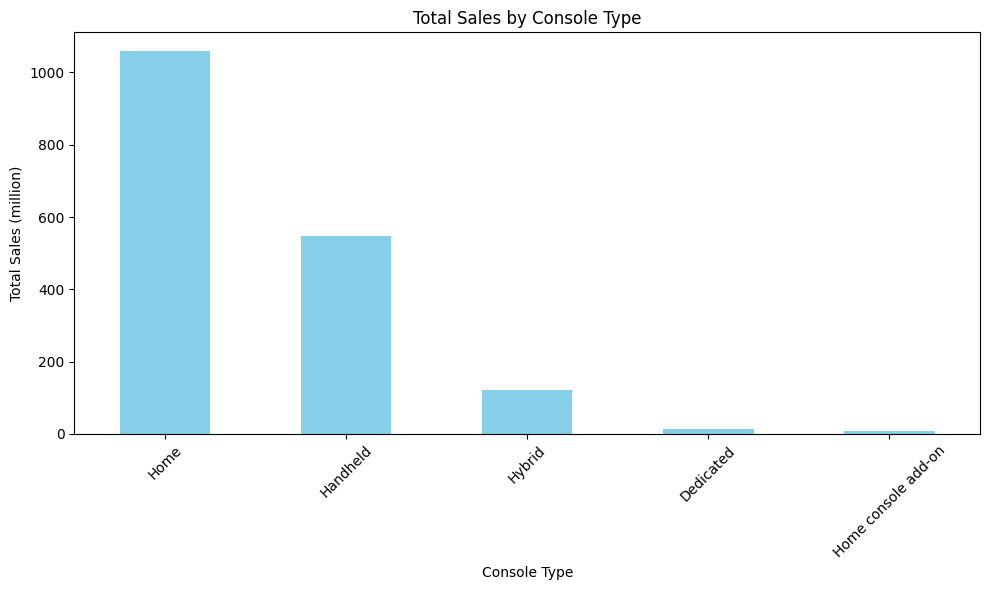

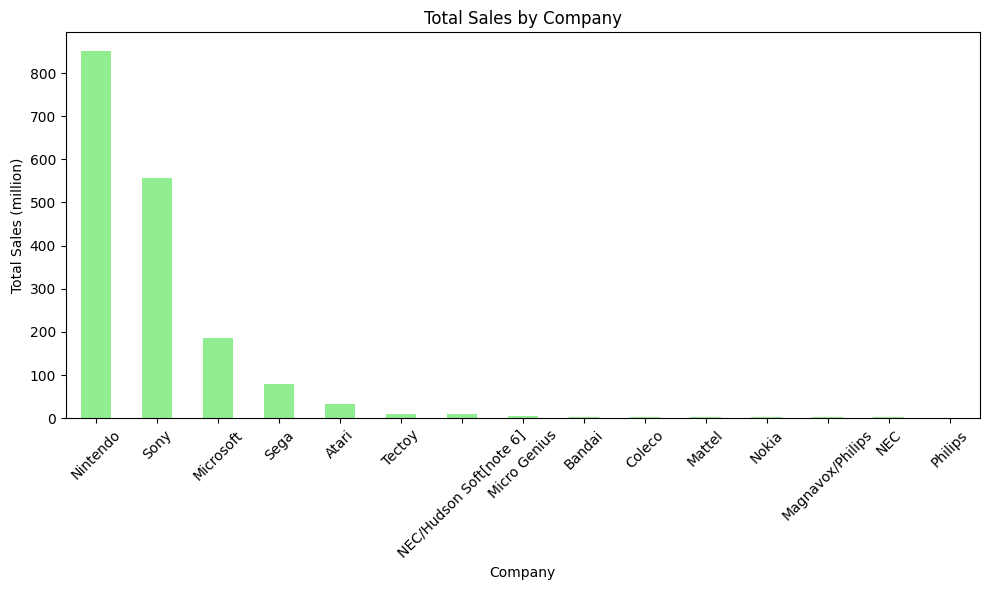

In [ ]:
import matplotlib.pyplot as plt

# Grouping sales by console type and calculating total sales for each type
sales_by_type = df.groupby('Type')['Units sold (million)'].sum().sort_values(ascending=False)

# Creating a bar plot to visualize sales by console type
plt.figure(figsize=(10, 6))
sales_by_type.plot(kind='bar', color='skyblue')
plt.xlabel('Console Type')
plt.ylabel('Total Sales (million)')
plt.title('Total Sales by Console Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

print("\n")

# Grouping sales by company and calculating total sales for each company
sales_by_company = df.groupby('Company')['Units sold (million)'].sum().sort_values(ascending=False)

# Creating a bar plot to visualize sales by company
plt.figure(figsize=(10, 6))
sales_by_company.plot(kind='bar', color='lightgreen')
plt.xlabel('Company')
plt.ylabel('Total Sales (million)')
plt.title('Total Sales by Company')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


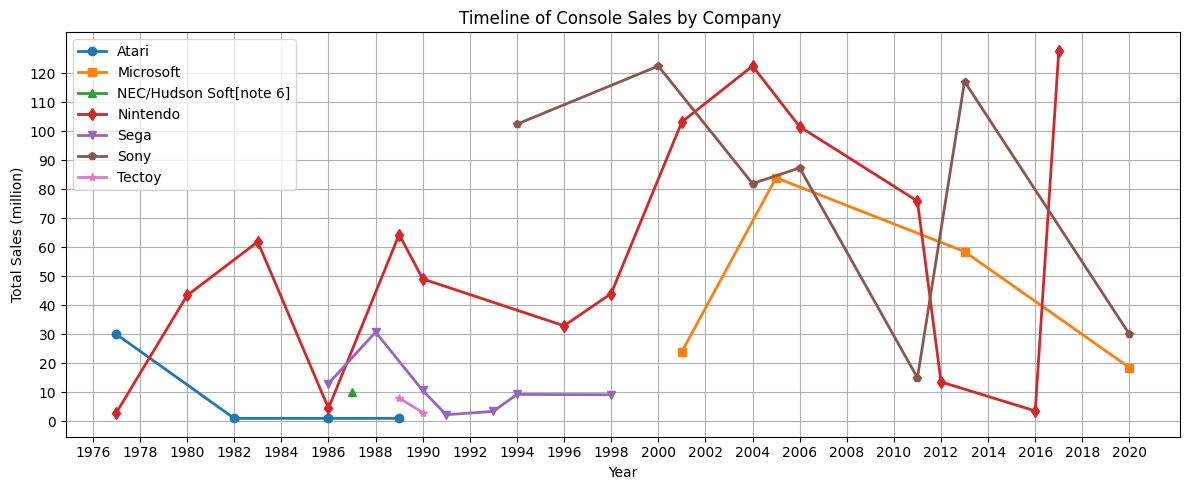

In [ ]:
import matplotlib.pyplot as plt

# Grouping sales by company and calculating total sales for each company
total_sales_by_company = df.groupby('Company')['Units sold (million)'].sum()

# Extracting companies with total sales greater than or equal to 10 units
selected_companies = total_sales_by_company[total_sales_by_company >= 10].index.tolist()

# Grouping sales by selected companies and released year, calculating total sales for each combination
sales_timeline = df[df['Company'].isin(selected_companies)].groupby(['Company', 'Released Year'])['Units sold (million)'].sum()

# Plotting the sales timeline for selected companies with improved formatting
plt.figure(figsize=(12, 5))

colors = plt.cm.tab10.colors  # Using a color palette
markers = ['o', 's', '^', 'd', 'v', 'p', '*', 'h']  # Marker styles

for i, company in enumerate(selected_companies):
    sales = sales_timeline.loc[company]
    plt.plot(sales.index, sales.values, label=company, marker=markers[i % len(markers)], color=colors[i % len(colors)], linewidth=2)

plt.xlabel('Year')
plt.ylabel('Total Sales (million)')
plt.title('Timeline of Console Sales by Company ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(range(int(df['Released Year'].min()), int(df['Released Year'].max()) + 1, 2))  # Set x-axis ticks every 2 years
plt.yticks(range(0, int(df['Units sold (million)'].max()) + 1, 10))  # Set y-axis ticks every 5 million
plt.tick_params(axis='both', which='major', labelsize=10)  # Set tick label size
plt.show()


In [ ]:
import pandas as pd

# Calculate the duration of sales for each console
df['Sales Duration'] = df['Discontinuation Year'] - df['Released Year']

# Calculate average sales per year for each console and round to 2 decimal points
df['Average Sales per Year (million)'] = (df['Units sold (million)'] / df['Sales Duration']).round(2)

# Display the updated DataFrame with the formatted 'Average Sales per Year' column
df.head()


,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks,Sales Duration,Average Sales per Year (million)
0,playstation 2,Home,Sony,2000,2013,122.55,Final sales are greater than 155 million,13,9.43
1,nintendo ds,Handheld,Nintendo,2004,2013,122.55,NaN,9,13.62
2,nintendo switch,Hybrid,Nintendo,2017,2024,122.55,NaN,7,17.51
3,game boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...,14,4.60
4,game boy color,Handheld,Nintendo,1998,2003,44.06,NaN,5,8.81


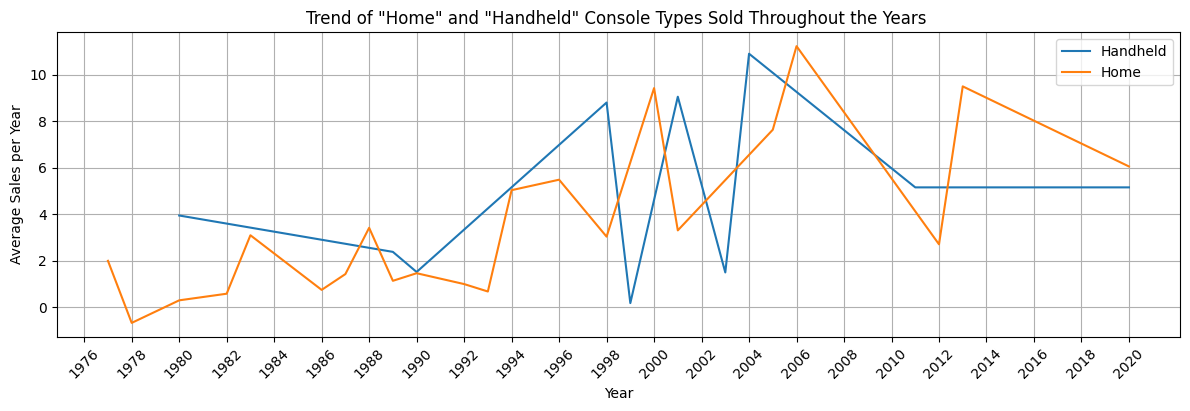

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for 'Home' and 'Handheld' types
filtered_df = df[df['Type'].isin(['Home', 'Handheld'])]

# Grouping by console type and released year, calculating the mean of average sales per year
type_sales_trend = filtered_df.groupby(['Type', 'Released Year'])['Average Sales per Year (million)'].mean().unstack(level=0)

# Create a range of years spanning the entire dataset
all_years = np.arange(df['Released Year'].min(), df['Released Year'].max() + 1)

# Reindex the data to include all years and perform linear interpolation to fill missing values
type_sales_trend = type_sales_trend.reindex(all_years).interpolate(method='linear')

# Plotting the trend of 'Home' and 'Handheld' console types sold throughout the years with missing values filled
plt.figure(figsize=(12, 4))

for col in type_sales_trend.columns:
    plt.plot(type_sales_trend.index, type_sales_trend[col], label=col)

plt.xlabel('Year')
plt.ylabel('Average Sales per Year')
plt.title('Trend of "Home" and "Handheld" Console Types Sold Throughout the Years ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(type_sales_trend.index[::2], rotation=45)  # Set x-ticks every 2 years
plt.show()


In [ ]:
# Select relevant features and target variable
X = df[['Released Year', 'Discontinuation Year', 'Average Sales per Year (million)']]
y = df['Units sold (million)']

# Filter rows where 'Discontinuation Year' is not equal to 0
cleaned_df = df[df['Discontinuation Year'] != 0]

# Updated features and target variable after filtering
X_cleaned = cleaned_df[['Released Year', 'Discontinuation Year']]
y_cleaned = cleaned_df['Units sold (million)']

# Split cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Initialize and train the model using cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predict on cleaned test data
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

# Evaluate model on cleaned data
print('Mean Squared Error (Cleaned Data):', mean_squared_error(y_test_cleaned, y_pred_cleaned))
print('R-squared (Cleaned Data):', r2_score(y_test_cleaned, y_pred_cleaned))


Mean Squared Error (Cleaned Data): 240.54680134578803
R-squared (Cleaned Data): 0.6771193416447616


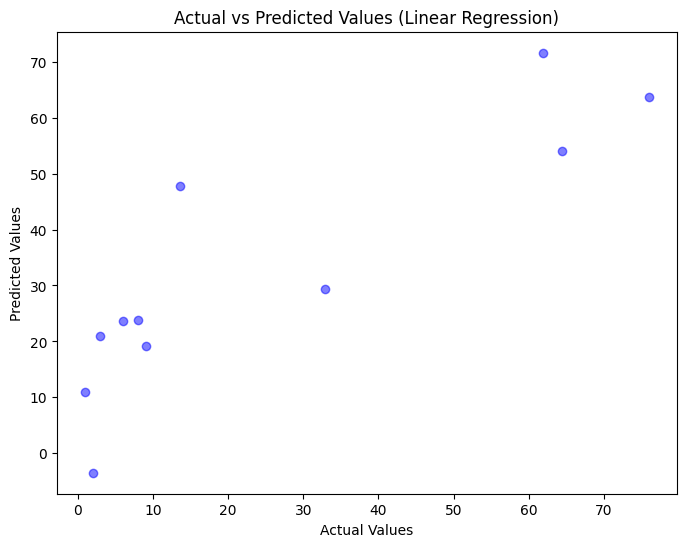

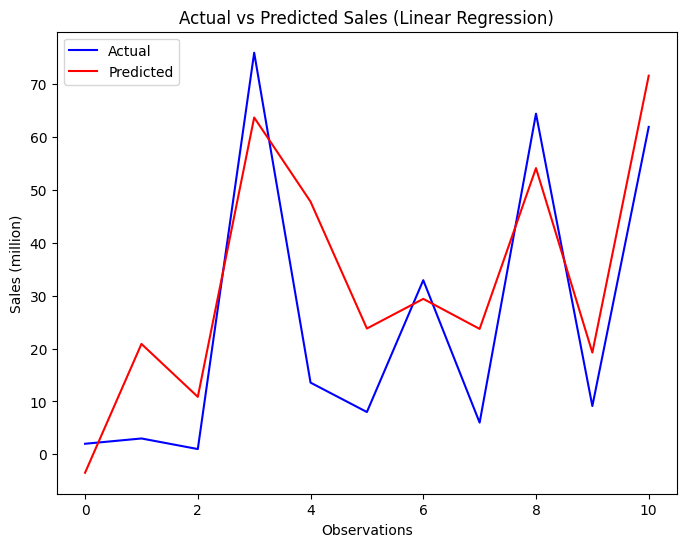

In [ ]:
import matplotlib.pyplot as plt


# Assuming 'y_test_cleaned' and 'y_pred_cleaned' are obtained from your model
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cleaned, y_pred_cleaned, color='blue', alpha=0.5)  # Actual vs Predicted
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

print("\n")

# Assuming 'y_test' and 'y_pred' are obtained from your model
plt.figure(figsize=(8, 6))
plt.plot(y_test_cleaned.values, label='Actual', color='blue')  # Assuming 'y_test_cleaned' is your cleaned test set
plt.plot(y_pred_cleaned, label='Predicted', color='red')  # Assuming 'y_pred_cleaned' is your predicted values
plt.xlabel('Observations')
plt.ylabel('Sales (million)')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.legend()
plt.show()


Mean Squared Error (Decision Tree - Cleaned Data): 577.4728636363636
R-squared (Decision Tree - Cleaned Data): 0.2248709301057653


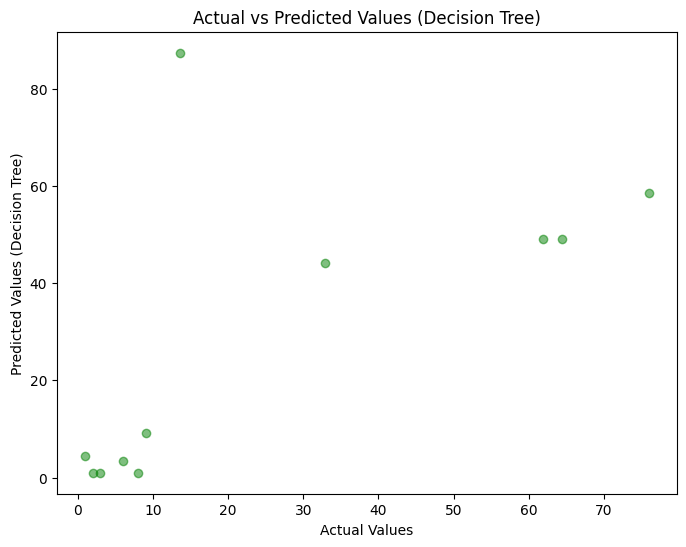

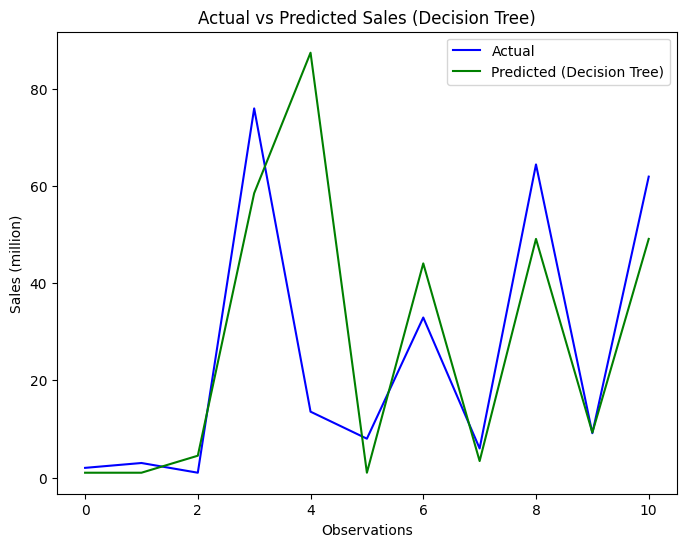

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model using cleaned data
tree_model_cleaned = DecisionTreeRegressor(random_state=42)
tree_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predict on cleaned test data using Decision Tree model
y_pred_tree_cleaned = tree_model_cleaned.predict(X_test_cleaned)

# Evaluate Decision Tree model on cleaned data
print('Mean Squared Error (Decision Tree - Cleaned Data):', mean_squared_error(y_test_cleaned, y_pred_tree_cleaned))
print('R-squared (Decision Tree - Cleaned Data):', r2_score(y_test_cleaned, y_pred_tree_cleaned))



# Scatter plot of actual vs predicted values (Decision Tree)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cleaned, y_pred_tree_cleaned, color='green', alpha=0.5)  # Actual vs Predicted (Decision Tree)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Decision Tree)')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.show()

print("\n")


# Line plot of actual and predicted values (Decision Tree)
plt.figure(figsize=(8, 6))
plt.plot(y_test_cleaned.values, label='Actual', color='blue')
plt.plot(y_pred_tree_cleaned, label='Predicted (Decision Tree)', color='green')
plt.xlabel('Observations')
plt.ylabel('Sales (million)')
plt.title('Actual vs Predicted Sales (Decision Tree)')
plt.legend()
plt.show()


Mean Squared Error (Random Forest - Cleaned Data): 376.40519537454526
R-squared (Random Forest - Cleaned Data): 0.4947596201199981


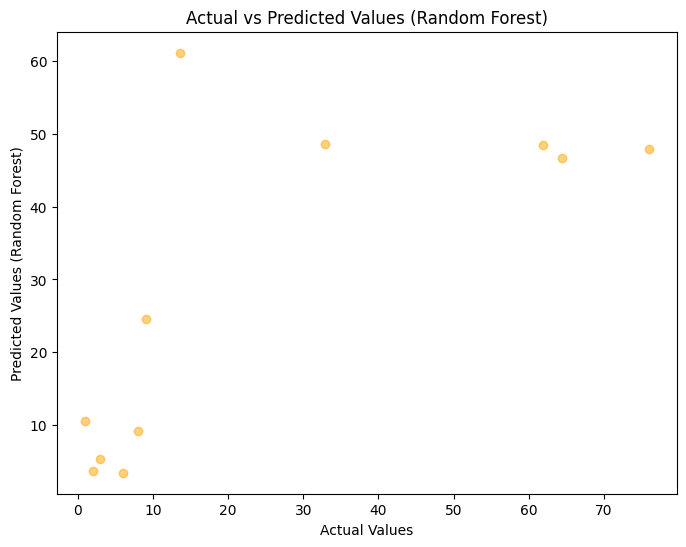

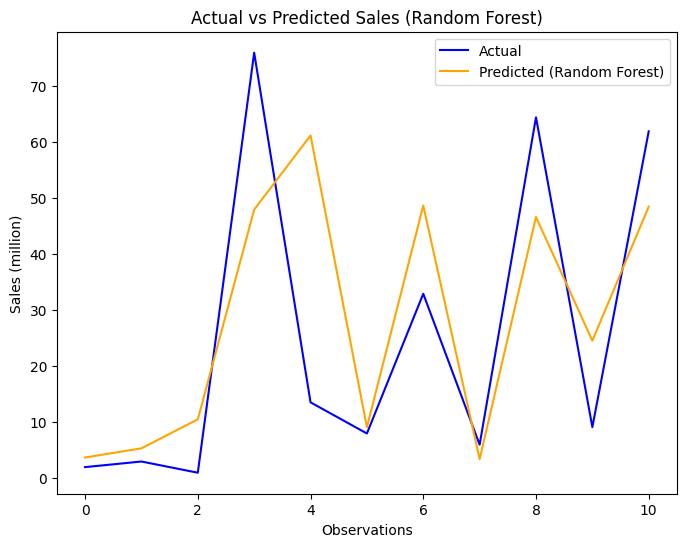

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model using cleaned data
forest_model_cleaned = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predict on cleaned test data using Random Forest model
y_pred_forest_cleaned = forest_model_cleaned.predict(X_test_cleaned)

# Evaluate Random Forest model on cleaned data
print('Mean Squared Error (Random Forest - Cleaned Data):', mean_squared_error(y_test_cleaned, y_pred_forest_cleaned))
print('R-squared (Random Forest - Cleaned Data):', r2_score(y_test_cleaned, y_pred_forest_cleaned))


# Scatter plot of actual vs predicted values (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cleaned, y_pred_forest_cleaned, color='orange', alpha=0.5)  # Actual vs Predicted (Random Forest)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Random Forest)')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.show()

print("\n")


# Line plot of actual and predicted values (Random Forest)
plt.figure(figsize=(8, 6))
plt.plot(y_test_cleaned.values, label='Actual', color='blue')
plt.plot(y_pred_forest_cleaned, label='Predicted (Random Forest)', color='orange')
plt.xlabel('Observations')
plt.ylabel('Sales (million)')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.legend()
plt.show()


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'Released Year' and 'Discontinuation Year' as features
# Select relevant features and target variable
X = df[['Released Year', 'Discontinuation Year']]
y = df['Units sold (million)']

# Filter rows where 'Discontinuation Year' is not equal to 0
cleaned_df = df[df['Discontinuation Year'] != 0]

# Updated features and target variable after filtering
X_cleaned = cleaned_df[['Released Year', 'Discontinuation Year']]
y_cleaned = cleaned_df['Units sold (million)']

# Split cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_cleaned_scaled = scaler.fit_transform(X_train_cleaned)
X_test_cleaned_scaled = scaler.transform(X_test_cleaned)

# Initialize and train a Multi-layer Perceptron (MLP) Regressor
model_nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model_nn.fit(X_train_cleaned_scaled, y_train_cleaned)

# Predict on cleaned test data using the MLP Regressor
y_pred_nn = model_nn.predict(X_test_cleaned_scaled)

# Evaluate model on cleaned data using MLP Regressor
print('Mean Squared Error (Neural Network):', mean_squared_error(y_test_cleaned, y_pred_nn))
print('R-squared (Neural Network):', r2_score(y_test_cleaned, y_pred_nn))


Mean Squared Error (Neural Network): 158.28002546939598
R-squared (Neural Network): 0.7875442178315321


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


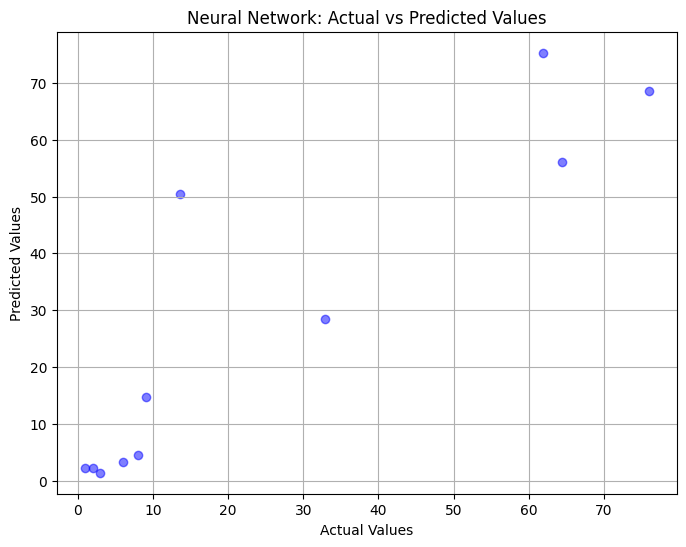

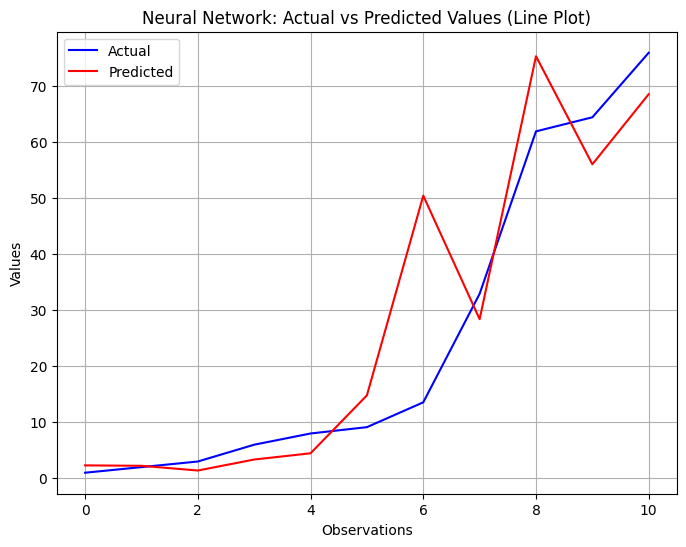

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results of the neural network prediction
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cleaned, y_pred_nn, color='blue', alpha=0.5)  # Actual vs Predicted
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network: Actual vs Predicted Values')
plt.grid(True)
plt.show()



# Sort the actual and predicted values based on the actual values (for line plot)
sorted_indexes = y_test_cleaned.argsort()
y_test_sorted = y_test_cleaned.iloc[sorted_indexes]
y_pred_nn_sorted = y_pred_nn[sorted_indexes]

# Line plot of actual and predicted values
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual', color='blue')
plt.plot(range(len(y_pred_nn_sorted)), y_pred_nn_sorted, label='Predicted', color='red')
plt.xlabel('Observations')
plt.ylabel('Values')
plt.title('Neural Network: Actual vs Predicted Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'Released Year', 'Discontinuation Year', and 'Average Sales per Year' as features
X = df[['Released Year', 'Discontinuation Year', 'Average Sales per Year (million)']]
y = df['Units sold (million)']

# Filter rows where 'Discontinuation Year' is not equal to 0
cleaned_df = df[df['Discontinuation Year'] != 0]

# Updated features and target variable after filtering
X_cleaned = cleaned_df[['Released Year', 'Discontinuation Year', 'Average Sales per Year (million)']]
y_cleaned = cleaned_df['Units sold (million)']

# Split cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_cleaned_scaled = scaler.fit_transform(X_train_cleaned)
X_test_cleaned_scaled = scaler.transform(X_test_cleaned)

# Initialize and train a Multi-layer Perceptron (MLP) Regressor with additional features
model_nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model_nn.fit(X_train_cleaned_scaled, y_train_cleaned)

# Predict on cleaned test data using the MLP Regressor
y_pred_nn = model_nn.predict(X_test_cleaned_scaled)

# Evaluate model on cleaned data using MLP Regressor
print('Mean Squared Error (Neural Network with Additional Feature):', mean_squared_error(y_test_cleaned, y_pred_nn))
print('R-squared (Neural Network with Additional Feature):', r2_score(y_test_cleaned, y_pred_nn))


Mean Squared Error (Neural Network with Additional Feature): 16.42072428401448
R-squared (Neural Network with Additional Feature): 0.9779588244872528


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


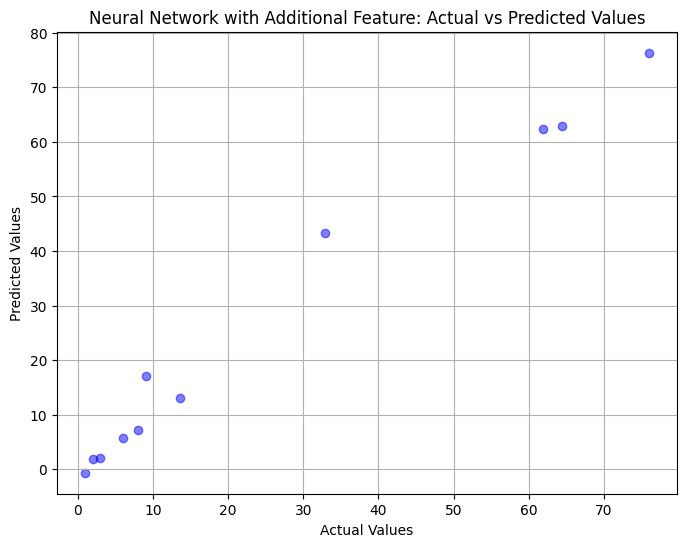

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results of the neural network prediction with an additional feature
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cleaned, y_pred_nn, color='blue', alpha=0.5)  # Actual vs Predicted
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network with Additional Feature: Actual vs Predicted Values')
plt.grid(True)
plt.show()


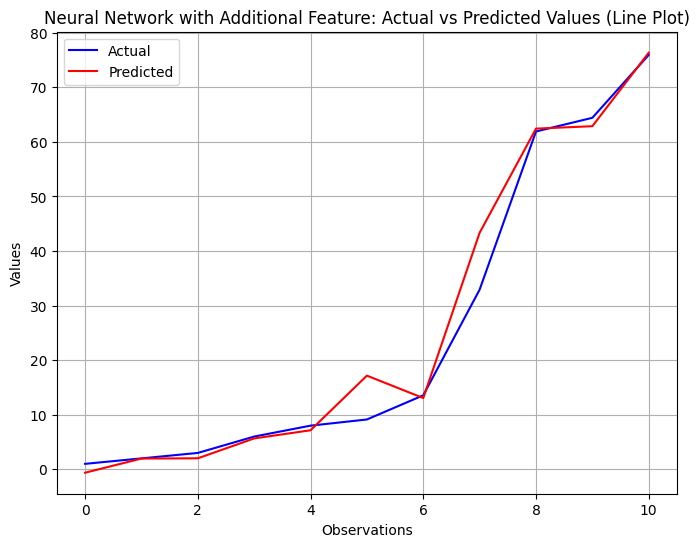

In [ ]:
import matplotlib.pyplot as plt

# Sort the actual and predicted values based on the actual values (for line plot)
sorted_indexes = y_test_cleaned.argsort()
y_test_sorted = y_test_cleaned.iloc[sorted_indexes]
y_pred_nn_sorted = y_pred_nn[sorted_indexes]

# Line plot of actual and predicted values with additional feature
plt.figure(figsize=(8, 6))
plt.plot(range(len(y_test_sorted)), y_test_sorted, label='Actual', color='blue')
plt.plot(range(len(y_pred_nn_sorted)), y_pred_nn_sorted, label='Predicted', color='red')
plt.xlabel('Observations')
plt.ylabel('Values')
plt.title('Neural Network with Additional Feature: Actual vs Predicted Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.show()
